<a href="https://colab.research.google.com/github/cesarinrc07-ship-it/ESTADISTICA_U4/blob/main/Proyecto_U3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
from google.colab import files
import pandas as pd

uploaded = files.upload()

df=pd.read_csv(list(uploaded.keys())[0])
df.to_csv('mexico_crime.csv', index=False)

df = pd.read_csv("mexico_crime.csv")
df.head()

Saving mexico_crime.csv to mexico_crime (1).csv


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0


In [ ]:
#2
df["entity"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [ ]:
#2
df = df[df["entity"] == "Yucatán"]

In [ ]:
#3
df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
#3
df.loc[:, "month"] = df["month"].astype(str).str.strip().str.title().map({
    "January" : "01", "February" : "02", "March" : "03", "April" : "04", "May" : "05", "June" : "06", "July" : "07", "August" : "08", "September" : "09", "October" : "10", "November" : "11", "December" : "12" })

In [ ]:
#3
# eliminar filas con NaN
df = df.dropna(subset=['month'])

# crea columna "Date", el dia simpre sera 01
df.loc[:, "Date"] = df["year"].astype(str) + "-" + df["month"].astype(str) + "-01"

# convierte a objeto datetime
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
#4
# agrupar datos por tipo de crimen y sumar conteos para cada categoria
df.groupby('type_of_crime')["count"].sum()

,count
type_of_crime,
Abduction,0
Abortion,26
Aggravated rape,31
Burglary,4267
Child trafficking,0
Corruption of minors,104
Counterfeiting,556
Crimes committed by public officials,97
Dispossession,1312


In [ ]:
#4
# filtrar para conservar solo los registros de "Abuso Sexual"
df = df[df["type_of_crime"] == "Sexual abuse"]

In [ ]:
#5
# agrupar los datos por fecha y sumar el conteo de casos para cada fecha
df = (df.groupby("Date")["count"].sum())

In [ ]:
# Reset the index if 'Date' is already the index to make it a column again
if 'Date' == df.index.name:
    df = df.reset_index()

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Asegurate de que los datos estén ordenados segun la fecha:
df = df.sort_values(by='Date')

# Y por último, asigna la fecha como un índice:
df.set_index('Date', inplace=True)

df

,count
Date,
2015-01-01,34
2015-02-01,32
2015-03-01,36
2015-04-01,36
2015-05-01,42
...,...
2023-06-01,7
2023-07-01,8
2023-08-01,10


a) Representar el gráfico de la serie de tiempo y agregar una media exponencial y una
media móvil con una ventana de tiempo representativa.


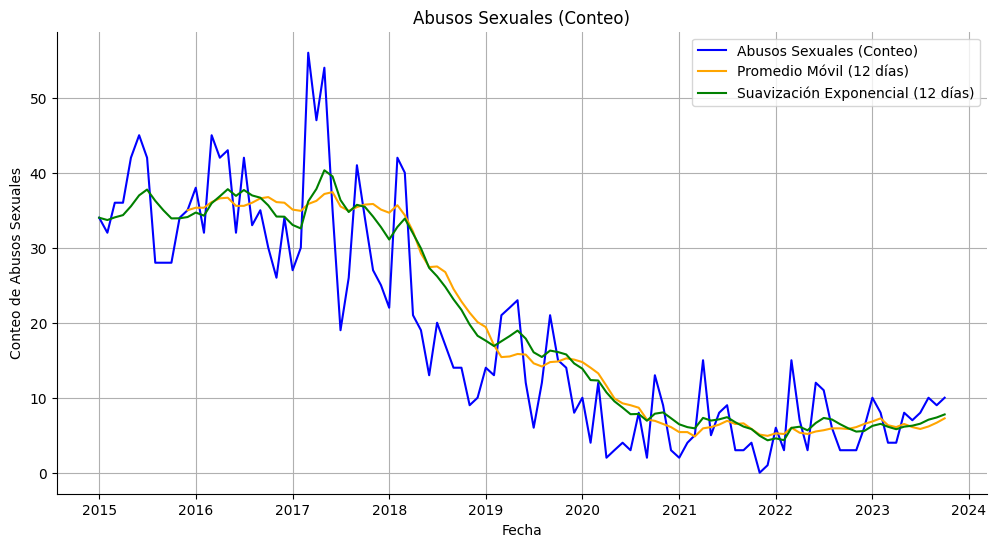

In [ ]:
import matplotlib.pyplot as plt

# Promedio Móvil Simple
ventana_sma = 12
df['SMA'] = df['count'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 12
df['SES'] = df['count'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['count'], label='Abusos Sexuales (Conteo)', color='blue')
plt.plot(df.index, df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df.index, df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Abusos Sexuales (Conteo)')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Abusos Sexuales')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# ventada de 12 = Suaviza bien el ruido, Muestra mejor la tendencia, Coincide con un ciclo anual (útil si hay estacionalidad)

b) Aplicar DFA para comprobar si la serie de tiempo es estacional o no.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en la tendencia
# Realiza la prueba ADF
adf_test = adfuller(df['count'].dropna())

# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.0472792779082518
p-value: 0.7356322893961688
La tendencia no es estacionaria (aceptamos la hipótesis nula).


c) Representar la tendencia mediante una regresión polinomial

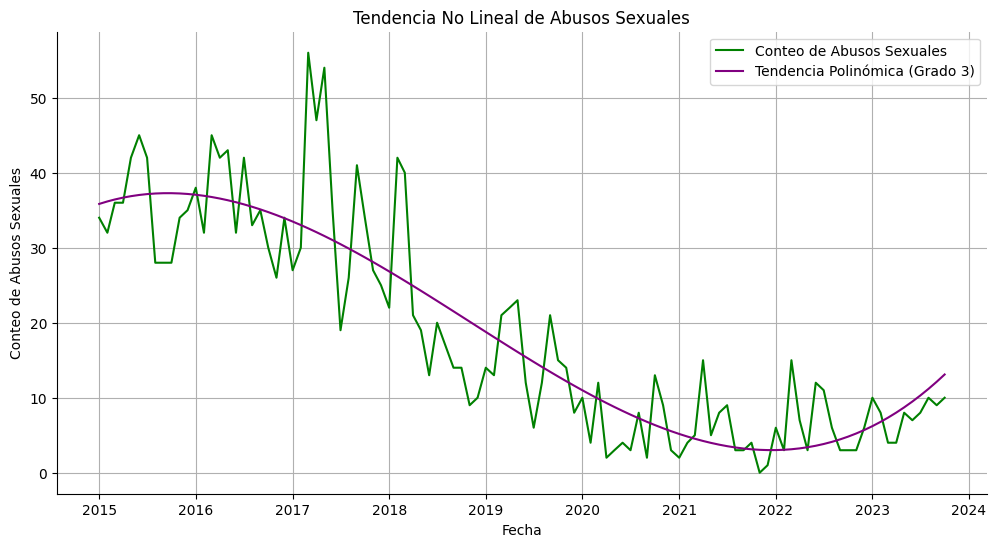

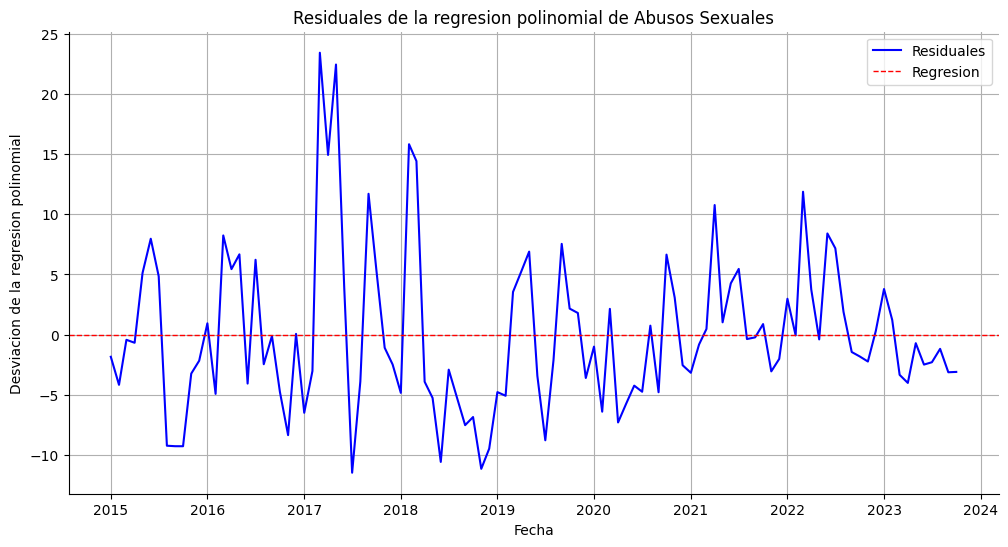

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# ...segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['count']

# Paso 3: Ajustar un modelo polinómico
grado = 3
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(y,label='Conteo de Abusos Sexuales', # etiqueta que aparecerá en la leyenda
    color='green')

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Abusos Sexuales') # título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Conteo de Abusos Sexuales')                       # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)


# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Abusos Sexuales')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

d) Extraer la estacionalidad mediante series de Fourier (recuerda que la unidad de
tiempo es mensual)

In [ ]:
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico, termino):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal
      if i == termino:
          df["seasonal_poly"] = componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

/tmp/ipython-input-636669421.py:32: RuntimeWarning: divide by zero encountered in divide
  'longitud_de_onda': 1 / frecuencias


Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.084906  156.636983         11.777778
1    0.018868  145.467514         53.000000
2    0.094340  134.856635         10.600000
3    0.169811  124.749792          5.888889
4    0.188679  116.711162          5.300000


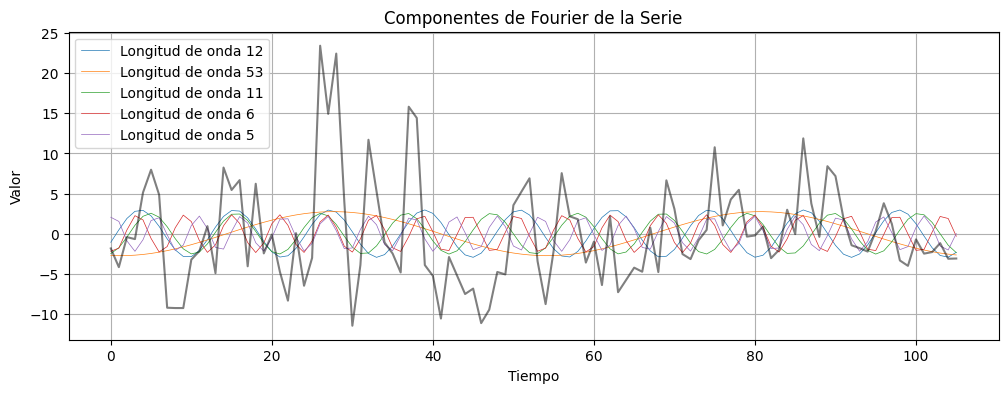

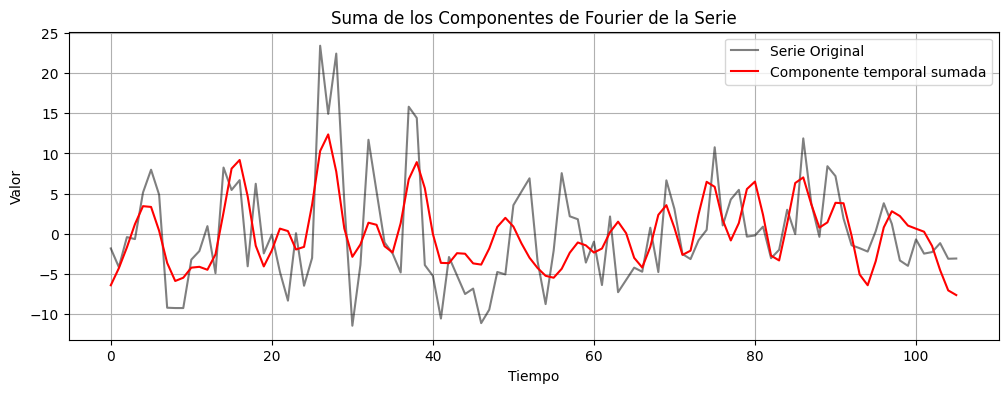

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico, 2)

# cts: componente temporal sumado


In [ ]:
df

,count,SMA,SES,Date,Poly_Trend,Poly_Resid,seasonal_poly
Date,,,,,,,
2015-01-01,34,NaN,34.000000,1.420070e+09,35.839921,-1.839921,-2.485453
2015-02-01,32,NaN,33.692308,1.422749e+09,36.171335,-4.171335,-1.757088
2015-03-01,36,NaN,34.047337,1.425168e+09,36.431455,-0.431455,-0.429225
2015-04-01,36,NaN,34.347747,1.427846e+09,36.676971,-0.676971,1.045084
2015-05-01,42,NaN,35.525017,1.430438e+09,36.873011,5.126989,2.162823
...,...,...,...,...,...,...,...
2023-06-01,7,6.083333,6.272157,1.685578e+09,9.489045,-2.489045,2.349886
2023-07-01,8,5.833333,6.537979,1.688170e+09,10.294009,-2.294009,1.403838
2023-08-01,10,6.166667,7.070597,1.690848e+09,11.181613,-1.181613,-0.021184


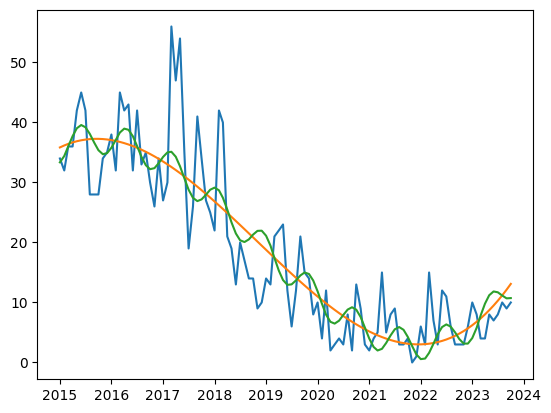

In [ ]:
plt.plot(df["count"])
plt.plot(df["Poly_Trend"])
plt.plot(df["Poly_Trend"] + df['seasonal_poly'])

e) Aplicar descomposición para la estacionalidad

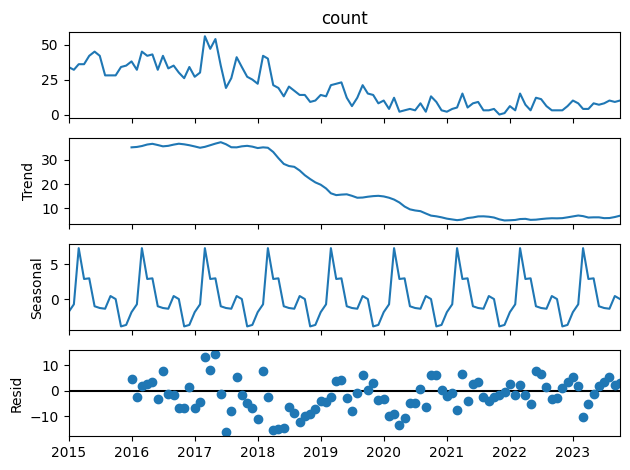

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['count'],
    model='additive',
    period=12,
    extrapolate_trend=0,
    two_sided=False,
    )
fig = descomposicion.plot()
plt.show()

f) Mediante gráficos, señalar si la estacionalidad parece tener un efecto significativo

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(descomposicion.resid.dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -6.002974325175243
p-value: 1.6405874412534227e-07
La tendencia es estacionaria (rechazamos la hipótesis nula).


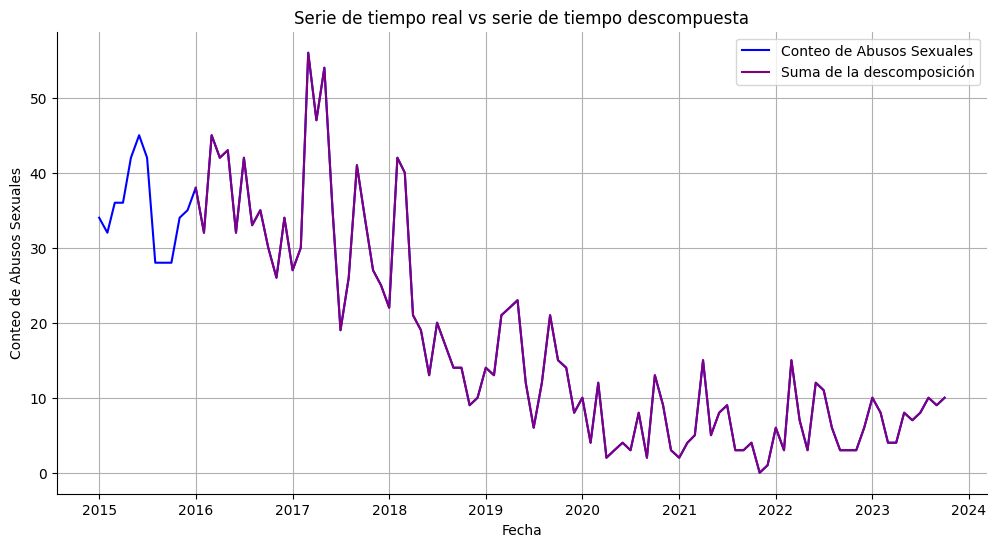

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['count'], label='Conteo de Abusos Sexuales', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Abusos Sexuales')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

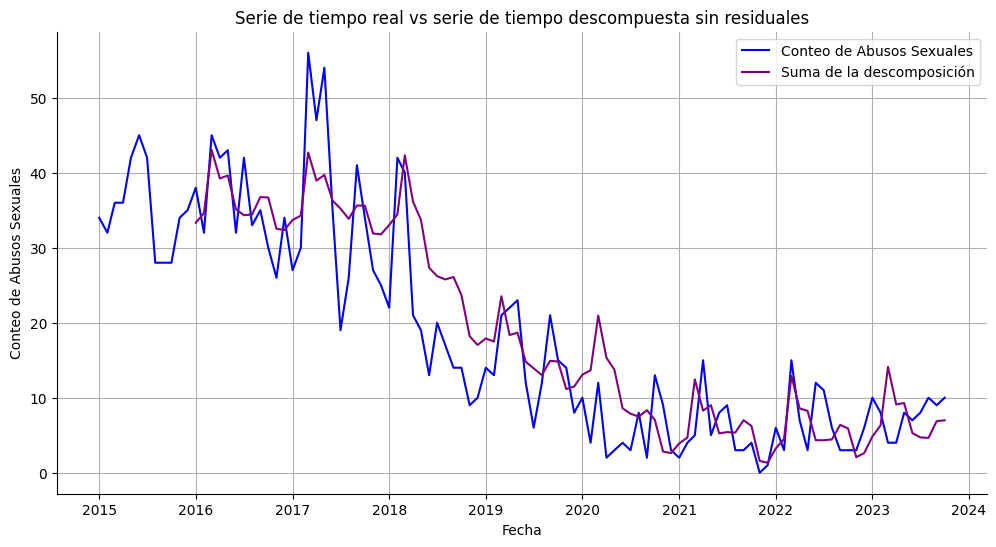

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['count'], label='Conteo de Abusos Sexuales', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Abusos Sexuales')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

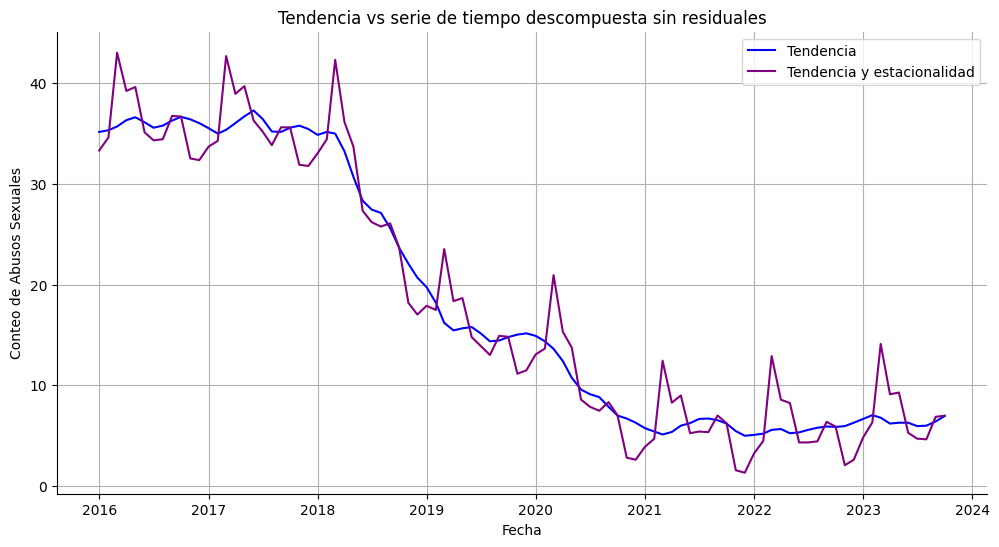

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Tendencia vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Abusos Sexuales')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

g) Mediante una prueba estadística, señalar si la estacionalidad parece tener un efecto
significativo.


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: -0.2599877457849049
Valor p: 0.7954479461182405


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.
